In [77]:
# Pyber Challenge


In [78]:
### 4.3 Loading and Reading CSV files

In [79]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [80]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [81]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [82]:
### Merge the DataFrames

In [83]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [84]:
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [85]:
## Deliverable 1: Get a Summary DataFrame 

In [86]:
#  1. Get the total rides for each city type
ttl_rides_by_city_type = pyber_data_df.groupby("type")["ride_id"].count()
ttl_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [87]:
# 2. Get the total drivers for each city type
ttl_drivers_by_city_type = pyber_data_df.groupby(["type","city"])["driver_count"].first().groupby("type").sum()
ttl_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [88]:
#  3. Get the total amount of fares for each city type
ttl_fares_by_city_type = pyber_data_df.groupby("type")["fare"].sum()
ttl_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [89]:
#  4. Get the average fare per ride for each city type.
avg_fare_per_ride = ttl_fares_by_city_type / ttl_rides_by_city_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [90]:
# 5. Get the average fare per driver for each city type
avg_fare_per_driver = ttl_fares_by_city_type / ttl_drivers_by_city_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [91]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({
    "Total Rides": ttl_rides_by_city_type,
    "Total Drivers": ttl_drivers_by_city_type,
    "Total Fares": ttl_fares_by_city_type,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [92]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [93]:
#  8. Format the columns.
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("{:.2f}".format)      
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("{:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [94]:
## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [95]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date. 
ttl_fare_per_date = pyber_data_df.groupby(['type','date'])["fare"].sum().reset_index()
ttl_fare_per_date

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [96]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
ttl_fare_per_date = ttl_fare_per_date.reset_index()

In [97]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
ttl_fare_per_date = ttl_fare_per_date.pivot(index="date", columns="type", values="fare")
ttl_fare_per_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [98]:
print (ttl_fare_per_date.index)

Index(['2019-01-01 00:08:16', '2019-01-01 00:46:46', '2019-01-01 02:07:24',
       '2019-01-01 03:46:50', '2019-01-01 05:23:21', '2019-01-01 09:45:36',
       '2019-01-01 12:32:48', '2019-01-01 14:40:14', '2019-01-01 14:42:25',
       '2019-01-01 14:52:06',
       ...
       '2019-05-07 20:05:15', '2019-05-07 20:22:19', '2019-05-07 20:40:29',
       '2019-05-08 01:54:18', '2019-05-08 02:31:25', '2019-05-08 04:20:00',
       '2019-05-08 04:39:49', '2019-05-08 07:29:01', '2019-05-08 11:38:35',
       '2019-05-08 13:10:18'],
      dtype='object', name='date', length=2375)


In [99]:
# # 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
ttl_fare_jan_apr_df = ttl_fare_per_date.loc[(ttl_fare_per_date.index > '2019-01-01') & (ttl_fare_per_date.index <= '2019-04-29')]
ttl_fare_jan_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [100]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
ttl_fare_jan_apr_df.index = pd.to_datetime(ttl_fare_jan_apr_df.index)
ttl_fare_jan_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [101]:
# 14. Check that the datatype for the index is datetime using df.info()
ttl_fare_jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [102]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
ttl_fare_jan_apr_df_week = ttl_fare_jan_apr_df.resample("W").sum()
ttl_fare_jan_apr_df_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


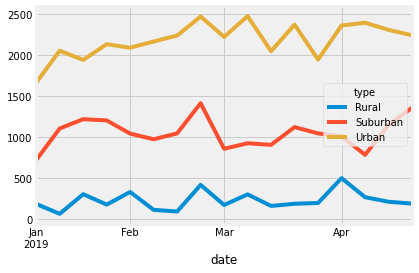

In [103]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ttl_fare_jan_apr_df_week.plot()

<function matplotlib.pyplot.show(*args, **kw)>

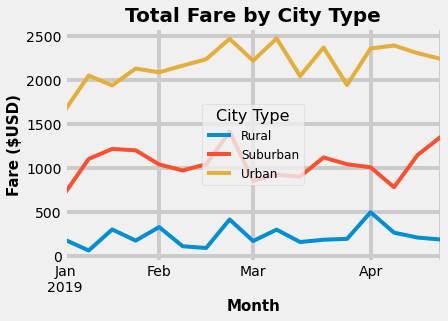

In [104]:
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates 
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.style.use('fivethirtyeight') 
ax = ttl_fare_jan_apr_df_week.plot()
# Set a title.
ax.set_title("Total Fare by City Type", fontsize=20, weight="bold")

#Label the axes.
ax.set_xlabel("Month", fontsize=15, weight='bold')
ax.set_ylabel("Fare ($USD)", fontsize=15, weight='bold')

# Create a legende.
lgnd = plt.legend(fontsize="12"
             , scatterpoints=1 
             , loc="center"  
             , title="City Type")  
lgnd.get_title().set_fontsize(16) 
lgnd.get_title().set_weight="bold" 
# Setting grid.
ax.grid(linewidth=4) 
# save the figure.
plt.savefig("analysis/Fig7.png")
plt.show